Dependency Management

In [1]:
%pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


Library Imports

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from utils.utils import encode
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, f1_score, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from scipy.stats import zscore

import import_ipynb
from tune import ModelTuner


Import Libraries

In [3]:
digits = datasets.load_digits()

df_digits = pd.DataFrame(digits.data, columns=[f'Pixel_{i}' for i in range(digits.data.shape[1])])
df_digits['Target'] = digits.target


housing = fetch_california_housing(as_frame=True)
X_housing = housing.data  
y_housing = housing.target  
df_housing = pd.concat([X_housing, y_housing.rename('MedHouseVal')], axis=1)  


Basic Information Pulls

In [4]:
df_digits.head()

Pixel_0  Pixel_1  Pixel_2  Pixel_3  Pixel_4  Pixel_5  Pixel_6  Pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   Pixel_8  Pixel_9  ...  Pixel_55  Pixel_56  Pixel_57  Pixel_58  Pixel_59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   

   Pixel_60  Pixel_61  Pixel_62  Pixel_63  Target  
0      10.0       0.0       0.0       0.0       0  
1      16.0      10.0       0.0       0.0       1  
2      11.0      16.0       9.0       0.0       2  
3      13.0       9.0       0.0       0.0       3  
4      16.0       4.0       0.0       0.0       4  

[5 rows x 65 columns]

In [5]:
df_housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [6]:
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pixel_0   1797 non-null   float64
 1   Pixel_1   1797 non-null   float64
 2   Pixel_2   1797 non-null   float64
 3   Pixel_3   1797 non-null   float64
 4   Pixel_4   1797 non-null   float64
 5   Pixel_5   1797 non-null   float64
 6   Pixel_6   1797 non-null   float64
 7   Pixel_7   1797 non-null   float64
 8   Pixel_8   1797 non-null   float64
 9   Pixel_9   1797 non-null   float64
 10  Pixel_10  1797 non-null   float64
 11  Pixel_11  1797 non-null   float64
 12  Pixel_12  1797 non-null   float64
 13  Pixel_13  1797 non-null   float64
 14  Pixel_14  1797 non-null   float64
 15  Pixel_15  1797 non-null   float64
 16  Pixel_16  1797 non-null   float64
 17  Pixel_17  1797 non-null   float64
 18  Pixel_18  1797 non-null   float64
 19  Pixel_19  1797 non-null   float64
 20  Pixel_20  1797 non-null   floa

In [7]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df_digits.describe()

Pixel_0      Pixel_1      Pixel_2      Pixel_3      Pixel_4  \
count   1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean       0.0     0.303840     5.204786    11.835838    11.848080   
std        0.0     0.907192     4.754826     4.248842     4.287388   
min        0.0     0.000000     0.000000     0.000000     0.000000   
25%        0.0     0.000000     1.000000    10.000000    10.000000   
50%        0.0     0.000000     4.000000    13.000000    13.000000   
75%        0.0     0.000000     9.000000    15.000000    15.000000   
max        0.0     8.000000    16.000000    16.000000    16.000000   

           Pixel_5      Pixel_6      Pixel_7      Pixel_8      Pixel_9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

          Pixel_55     Pixel_56     Pixel_57     Pixel_58     Pixel_59  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.206455     0.000556     0.279354     5.557596    12.089037   
std       0.984401     0.023590     0.934302     5.103019     4.374694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000    11.000000   
50%       0.000000     0.000000     0.000000     4.000000    13.000000   
75%       0.000000     0.000000     0.000000    10.000000    16.000000   
max      13.000000     1.000000     9.000000    16.000000    16.000000   

          Pixel_60     Pixel_61     Pixel_62     Pixel_63       Target  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     11.809126     6.764051     2.067891     0.364496     4.490818  
std       4.933947     5.900623     4.090548     1.860122     2.865304  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      10.000000     0.000000     0.000000     0.000000     2.000000  
50%      14.000000     6.000000     0.000000     0.000000     4.000000  
75%      16.000000    12.000000     2.000000     0.000000     7.000000  
max      16.000000    16.000000    16.000000    16.000000     9.000000  

[8 rows x 65 columns]

In [9]:
df_housing.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

Check for missing values and duplicates

In [10]:
missing_values = df_digits.isnull().sum()
print("\nMissing values in each column:\n", missing_values[missing_values > 0])

print(f'\nDuplicates: {df_digits.duplicated().sum()}')



Missing values in each column:
 Series([], dtype: int64)

Duplicates: 0


In [11]:
missing_values = df_housing.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


--Classification EDA Work--
-Plotting value counts and distribution of pixels

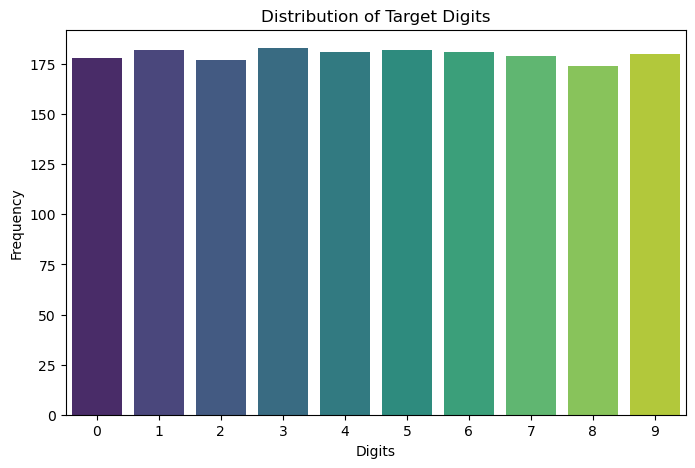

In [12]:
target_counts = df_digits['Target'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title("Distribution of Target Digits")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

Create correlation matrix and heatmap

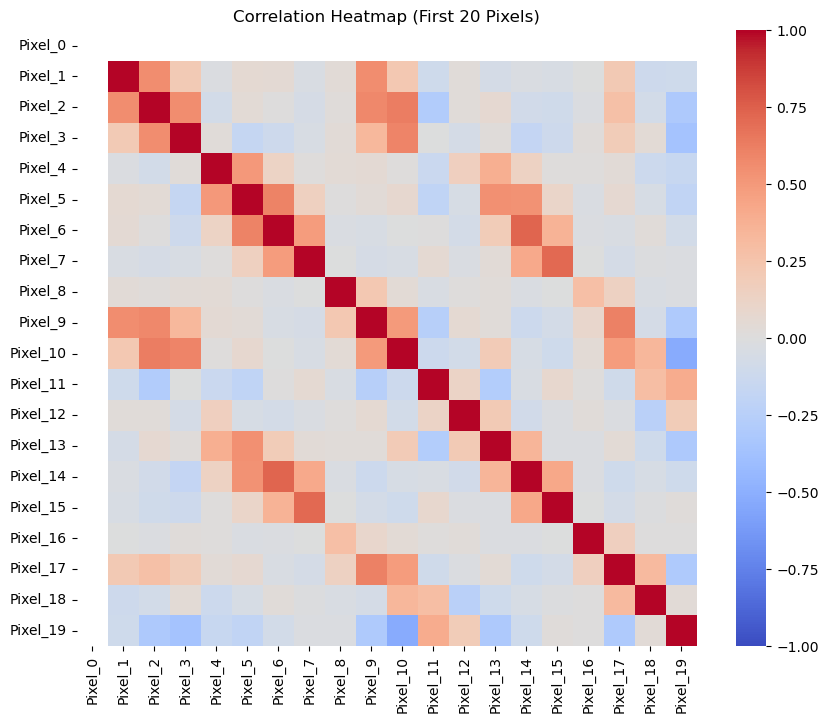

In [13]:

correlation_matrix = df_digits.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.iloc[:20, :20], annot=False, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap (First 20 Pixels)")
plt.show()

Calculating Feature Variance

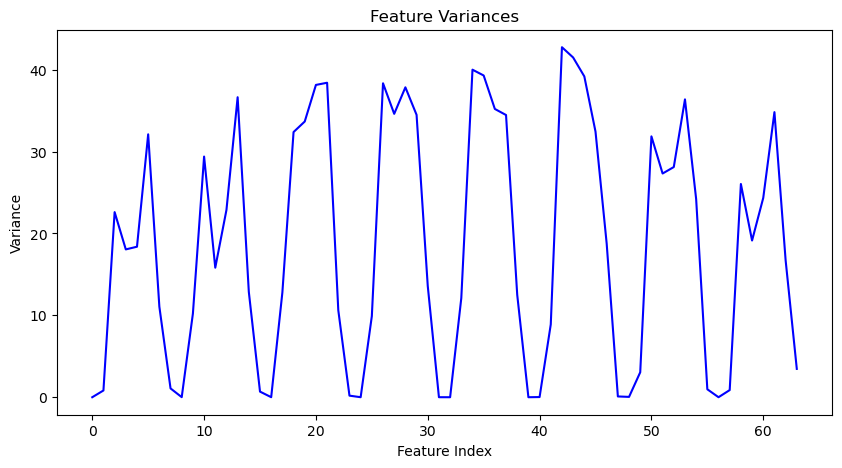


Low-variance features:
 Pixel_0     0.000000
Pixel_8     0.008878
Pixel_16    0.003890
Pixel_24    0.001112
Pixel_31    0.002222
Pixel_32    0.000000
Pixel_39    0.000000
Pixel_40    0.021079
Pixel_47    0.094468
Pixel_48    0.041707
Pixel_56    0.000556
dtype: float64


In [14]:
feature_variances = df_digits.var().drop('Target')


plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(feature_variances)), y=feature_variances, color='blue')
plt.title("Feature Variances")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.show()


low_variance_features = feature_variances[feature_variances < 0.1]
print("\nLow-variance features:\n", low_variance_features)

Dimensionality Reduction using PCA

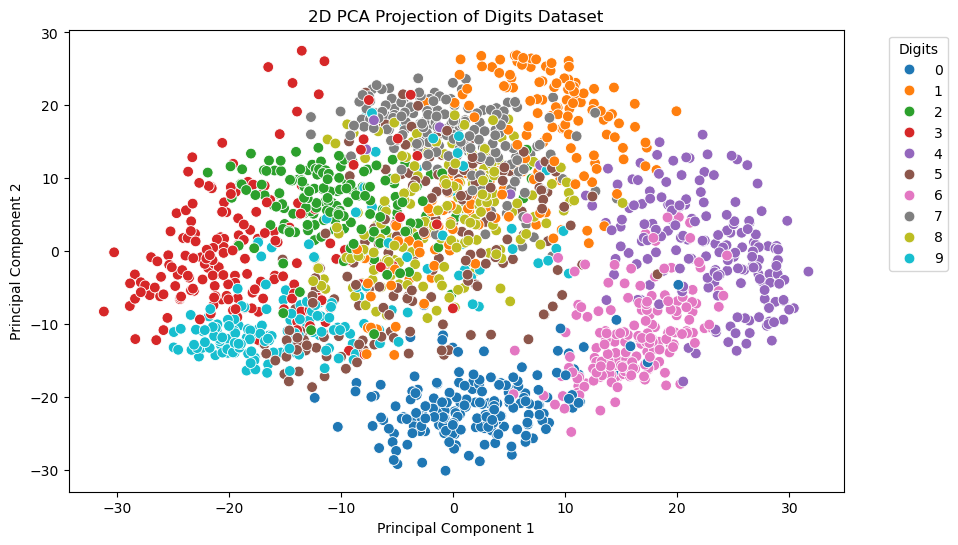

In [15]:
pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=digits_pca[:, 0], y=digits_pca[:, 1], hue=digits.target, palette='tab10', s=60)
plt.title("2D PCA Projection of Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Data Filtering to Isolate '0'

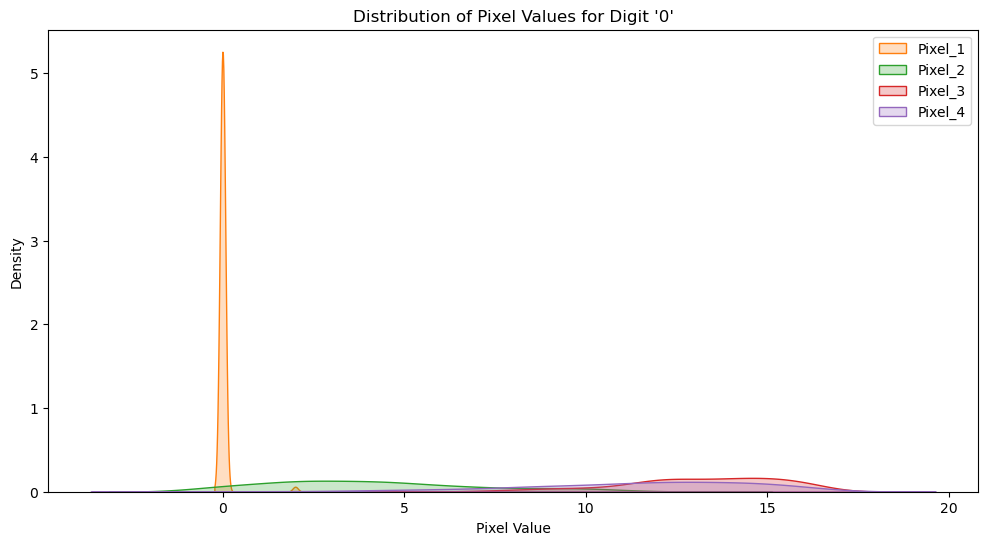

In [16]:

digit_zero = df_digits[df_digits['Target'] == 0]


plt.figure(figsize=(12, 6))
for i in range(5):
    sns.kdeplot(digit_zero[f'Pixel_{i}'], label=f'Pixel_{i}', fill=True)
plt.title("Distribution of Pixel Values for Digit '0'")
plt.xlabel("Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.show()

Pixel Pairplotting

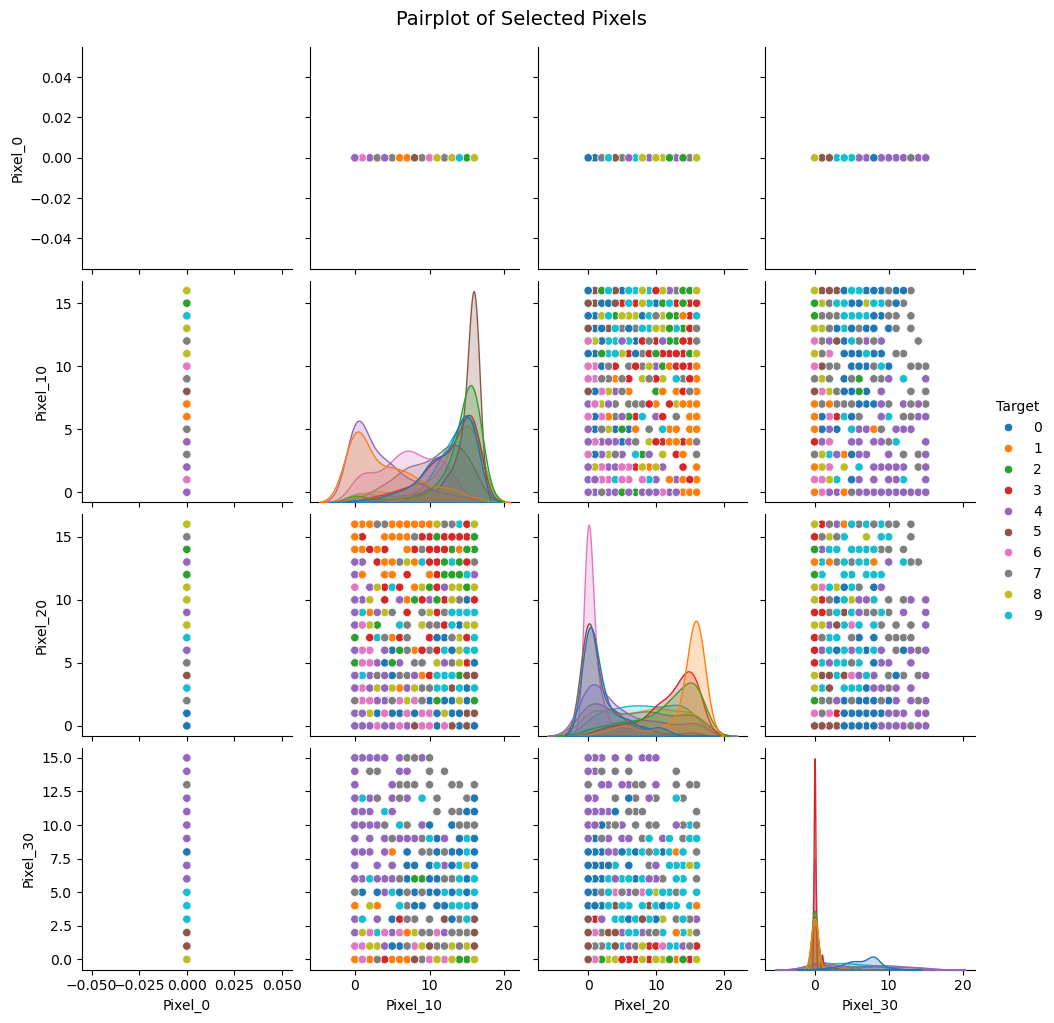

In [17]:

selected_pixels = ['Pixel_0', 'Pixel_10', 'Pixel_20', 'Pixel_30', 'Target']
sns.pairplot(df_digits[selected_pixels], hue='Target', palette='tab10')
plt.suptitle("Pairplot of Selected Pixels", y=1.02, fontsize=14)
plt.show()

Pixel Intensity Heatmap

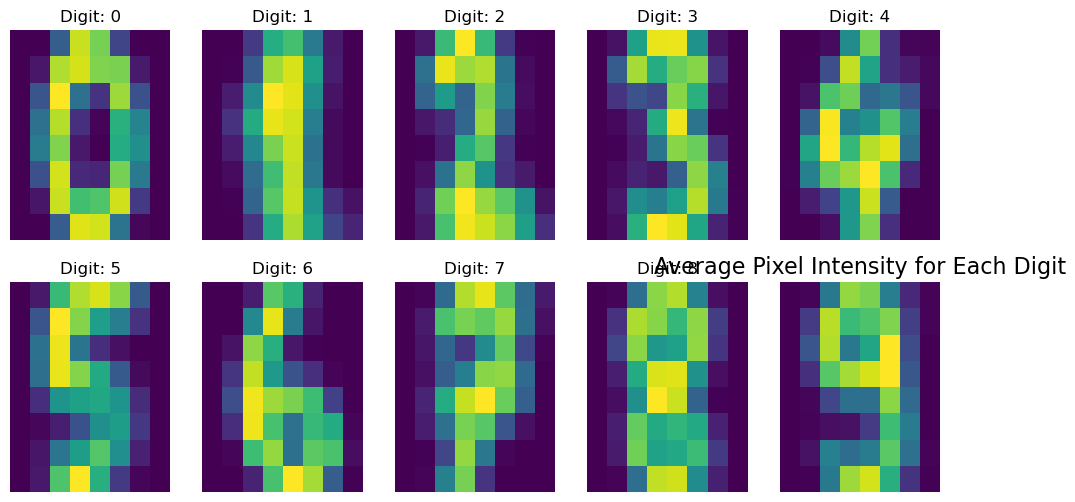

In [18]:

mean_pixel_intensity = df_digits.groupby('Target').mean().iloc[:, :64]


fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    digit_heatmap = mean_pixel_intensity.iloc[i].values.reshape(8, 8)
    sns.heatmap(digit_heatmap, ax=ax, cmap='viridis', cbar=False, annot=False)
    ax.set_title(f"Digit: {i}")
    ax.axis('off')
plt.title("Average Pixel Intensity for Each Digit", fontsize=16)
plt.show()

In [19]:
# Scoring criteria
scoring_criteria = {
    'classification': ['accuracy', 'f1_macro', 'balanced_accuracy', 'precision_macro', 'recall_macro', 'average_precision']
}

# Classifier and regressor parameter spaces
models_param_spaces = {
    'DecisionTreeClassifier': {
        'bayesian': {
            'model__criterion': Categorical(['gini', 'entropy']),
            'model__splitter': Categorical(['best', 'random']),
            'model__max_depth': Integer(1, 25),
            'model__min_samples_split': Integer(2, 10),
            'model__min_samples_leaf': Integer(1, 10),
            'pca__n_components': Integer(1, len(df_digits.columns)-1),
            'scaler__with_mean': [True, False],
            'scaler__with_std': [True, False],
        }
    },
    'RandomForestClassifier': {
        'bayesian': {
            'model__n_estimators': [50, 100, 200, 300],
            'model__criterion': Categorical(['gini', 'entropy']),
            'model__max_depth': Integer(1, 40), 
            'model__min_samples_split': Integer(2, 10),
            'model__min_samples_leaf': Integer(1, 5),
            'model__bootstrap': [True, False],
            'pca__n_components': Integer(1, len(df_digits.columns)-1),
            'scaler__with_mean': [True, False],
            'scaler__with_std': [True, False],
        }
    }
}


In [20]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df_digits.drop(columns=['Target']), df_digits['Target'], test_size=0.3, random_state=42)

Tuning DecisionTreeClassifier (classification) with bayesian search and scoring metric: accuracy
Best Params: OrderedDict({'model__criterion': 'entropy', 'model__max_depth': 18, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__splitter': 'best', 'pca__n_components': 18, 'scaler__with_mean': False, 'scaler__with_std': False})
Best Score (Train): 0.8456829440905874
Test Score: 0.8444444444444444
--------------------------------------------------------------------------------
Classification Report for DecisionTreeClassifier with accuracy:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.87      0.68      0.76        50
           2       0.85      0.87      0.86        47
           3       0.75      0.83      0.79        54
           4       0.97      0.93      0.95        60
           5       0.83      0.83      0.83        66
           6       0.81      0.91      0.86        53
   

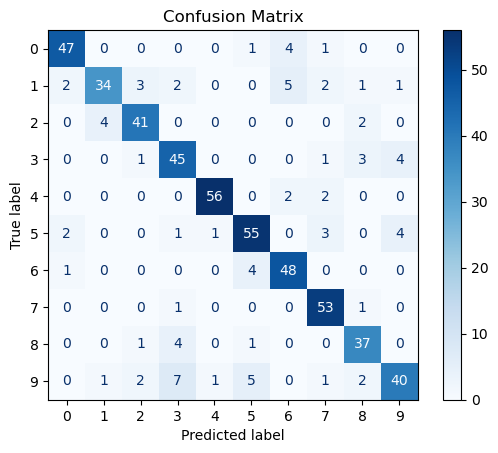

Feature Importances for DecisionTreeClassifier:
[0.3060969938042599, 0.17955354940482976, 0.1303188205095895, 0.11108906124080796, 0.09382835654576412, 0.042513946248518085, 0.039517654557883114, 0.034995815176102, 0.014278212686690184, 0.012071867704948802, 0.011868252428633624, 0.008431549372693052, 0.006214156487773099, 0.0029727625567480885, 0.002486474059331768, 0.002420666413645155, 0.001341860801781582, 0.0]
--------------------------------------------------------------------------------
Tuning DecisionTreeClassifier (classification) with bayesian search and scoring metric: f1_macro
Best Params: OrderedDict({'model__criterion': 'entropy', 'model__max_depth': 9, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__splitter': 'best', 'pca__n_components': 19, 'scaler__with_mean': False, 'scaler__with_std': False})
Best Score (Train): 0.838930678804045
Test Score: 0.8484824918007277
--------------------------------------------------------------------------------
Clas

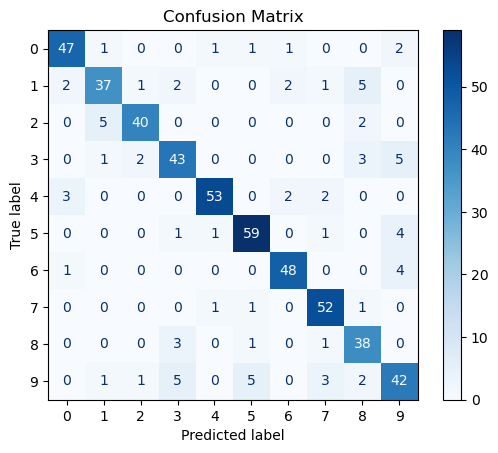

Feature Importances for DecisionTreeClassifier:
[0.30214266427182446, 0.18005942741828496, 0.12191373915164821, 0.11566777285042143, 0.09338022068853395, 0.043257165741224395, 0.039925736138465506, 0.03590612548403688, 0.01392942245712074, 0.013004050309401641, 0.011807305433611338, 0.011768022888602415, 0.008391279248127166, 0.002721227539188116, 0.0024745983511228566, 0.0014847590106737136, 0.0014847590106737136, 0.0006817240070382683, 0.0]
--------------------------------------------------------------------------------
Tuning DecisionTreeClassifier (classification) with bayesian search and scoring metric: balanced_accuracy
Best Params: OrderedDict({'model__criterion': 'entropy', 'model__max_depth': 25, 'model__min_samples_leaf': 1, 'model__min_samples_split': 3, 'model__splitter': 'best', 'pca__n_components': 17, 'scaler__with_mean': False, 'scaler__with_std': False})
Best Score (Train): 0.8515863375130618
Test Score: 0.8558923095902647
----------------------------------------------

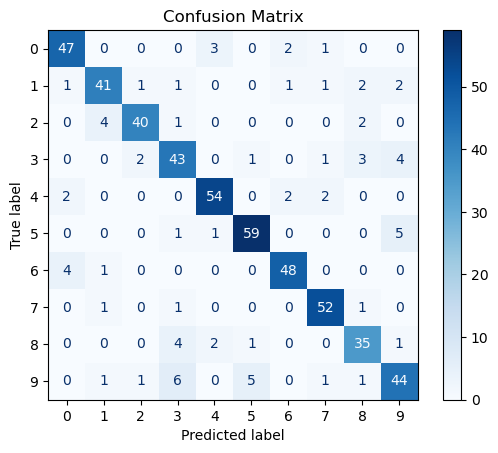

Feature Importances for DecisionTreeClassifier:
[0.2936818937602825, 0.17709150238911692, 0.12727354721815545, 0.11186576908081731, 0.09455509795285053, 0.04474889712934355, 0.03851409972118049, 0.0328133248711853, 0.014485979199692349, 0.012693527673010449, 0.01245260097051425, 0.011496055630119179, 0.007342262716600473, 0.007322905302802014, 0.006346394545361168, 0.00490897014562542, 0.002407171693342616]
--------------------------------------------------------------------------------
Tuning DecisionTreeClassifier (classification) with bayesian search and scoring metric: precision_macro


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Best Params: OrderedDict({'model__criterion': 'entropy', 'model__max_depth': 19, 'model__min_samples_leaf': 2, 'model__min_samples_split': 9, 'model__splitter': 'best', 'pca__n_components': 64, 'scaler__with_mean': True, 'scaler__with_std': False})
Best Score (Train): 0.8327663781591843
Test Score: 0.8261915015822148
--------------------------------------------------------------------------------
Classification Report for DecisionTreeClassifier with precision_macro:

              precision    recall  f1-score   support

           0       0.93      0.79      0.86        53
           1       0.74      0.70      0.72        50
           2       0.79      0.79      0.79        47
           3       0.83      0.80      0.81        54
           4       0.92      0.93      0.93        60
           5       0.81      0.89      0.85        66
           6       0.80      0.91      0.85        53
           7       0.86      0.93      0.89        55
           8       0.76      0.79      0.

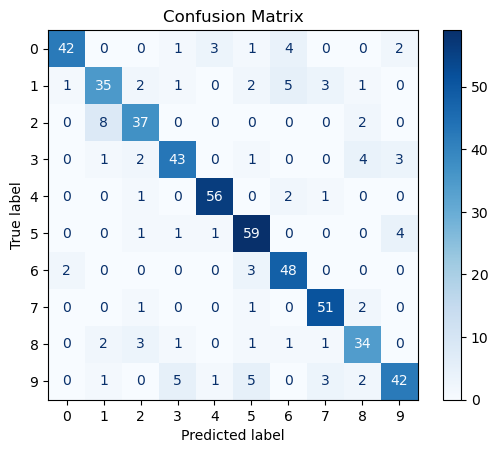

Feature Importances for DecisionTreeClassifier:
[0.30105000879981103, 0.1808421727087584, 0.11852406854444342, 0.0978493797079275, 0.08974665287248311, 0.03868860759315158, 0.034475360084265376, 0.029739120934096284, 0.010790339872618812, 0.010165405426311764, 0.009888864388754451, 0.008492061075446308, 0.007866961418039857, 0.0077202162406060214, 0.006853131128605403, 0.006021915014600653, 0.005632264462270276, 0.00365103890797519, 0.0035625346901251654, 0.0035347861356663786, 0.0028643384353380296, 0.002738305656119498, 0.0025619323588537066, 0.0025043190333135677, 0.00215269794857404, 0.00195343622713746, 0.0015113930052298586, 0.0014718672406439312, 0.0014381690890897117, 0.0014030584167575744, 0.0012701974071856806, 0.0012701974071856806, 0.0009145704815545062, 0.0008506272870598287, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------

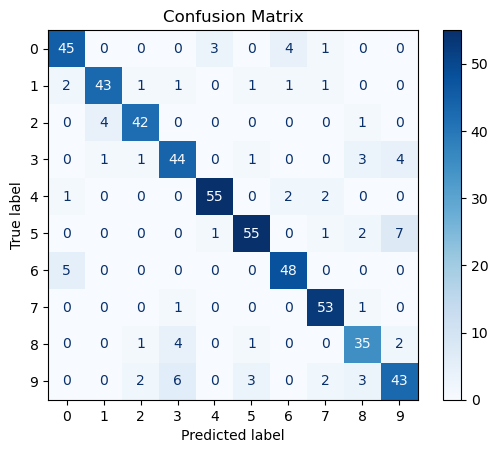

Feature Importances for DecisionTreeClassifier:
[0.30363973180997816, 0.1796313621715643, 0.12798908643132353, 0.1147027190281395, 0.09786593967437379, 0.051465598409048983, 0.03736805664469985, 0.03434794703431364, 0.019431449027393934, 0.016568179779638936, 0.011013952565020378, 0.0059759774245050894]
--------------------------------------------------------------------------------
Tuning DecisionTreeClassifier (classification) with bayesian search and scoring metric: average_precision
Best Params: OrderedDict({'model__criterion': 'gini', 'model__max_depth': 17, 'model__min_samples_leaf': 8, 'model__min_samples_split': 10, 'model__splitter': 'best', 'pca__n_components': 18, 'scaler__with_mean': False, 'scaler__with_std': False})
Best Score (Train): 0.8214063359273374
Test Score: 0.8522255168029804
--------------------------------------------------------------------------------
Classification Report for DecisionTreeClassifier with average_precision:

              precision    recall  

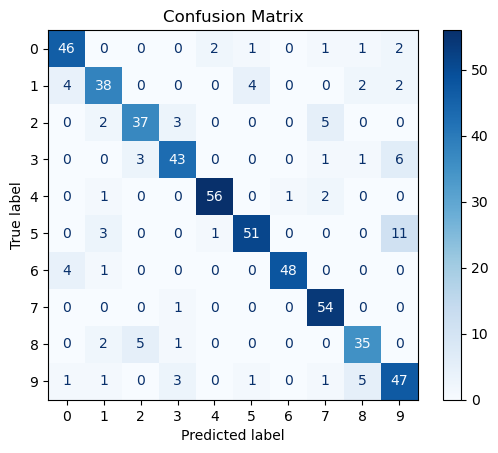

Feature Importances for DecisionTreeClassifier:
[0.22165484610973557, 0.19901784582447785, 0.17308174989901934, 0.11688594340563449, 0.09279143790099367, 0.05920877126348187, 0.03166365899130665, 0.028798960507580386, 0.026743830247785805, 0.02005865077988446, 0.01165030418219617, 0.0062936955548002944, 0.004868551423613483, 0.0030285166455382, 0.002695335141496946, 0.001062392519818859, 0.0004955096026358903, 0.0]
--------------------------------------------------------------------------------
Evaluating DecisionTreeClassifier with scoring metric: accuracy
Evaluating DecisionTreeClassifier with scoring metric: f1_macro
Evaluating DecisionTreeClassifier with scoring metric: balanced_accuracy
Evaluating DecisionTreeClassifier with scoring metric: precision_macro
Evaluating DecisionTreeClassifier with scoring metric: recall_macro
Evaluating DecisionTreeClassifier with scoring metric: average_precision
Tuning RandomForestClassifier (classification) with bayesian search and scoring metric:

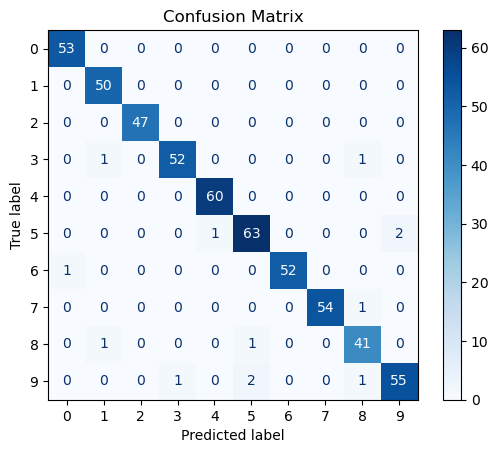

Feature Importances for RandomForestClassifier:
[0.1336738973962869, 0.11324699866176656, 0.07737614071303833, 0.07551435394777588, 0.06917866484853517, 0.05291616829358773, 0.03842077193835996, 0.037316254173498174, 0.03704054197925917, 0.026167741380008415, 0.015876571206080083, 0.01363293340022932, 0.012818421050564187, 0.012309153969904441, 0.01211891797296481, 0.011978698278436534, 0.01100313932848857, 0.010965743815731373, 0.010020965637242031, 0.009969106274873773, 0.009139962310285335, 0.008368939756353234, 0.00807914048896064, 0.007855377681007074, 0.007334414275275486, 0.007277116116726035, 0.007218644636845317, 0.007181277379430978, 0.007057854459962212, 0.007034384377203193, 0.006890002409525041, 0.006700840975144027, 0.0066229997665714765, 0.006314948420873907, 0.006042118397726828, 0.005728828297444182, 0.005629292221400369, 0.005426156181477008, 0.005425103042566582, 0.005277590995676234, 0.005009006035639793, 0.005007027764539324, 0.004627434306107903, 0.004575838955210

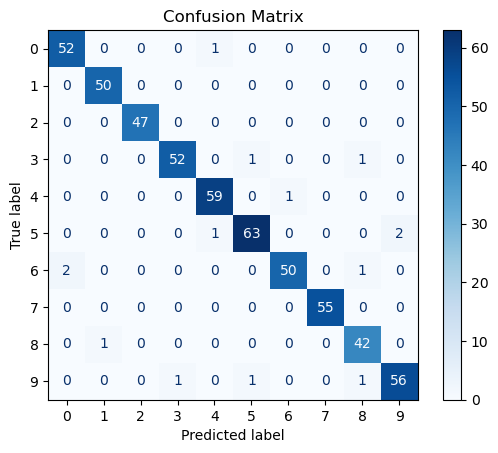

Feature Importances for RandomForestClassifier:
[0.15545682996872676, 0.14985874948654107, 0.09302121241632853, 0.07608054319706355, 0.07544079376393154, 0.05101426603645752, 0.049210434352569304, 0.04765012923599074, 0.045112160721488506, 0.030866467127813282, 0.020576110241100145, 0.018918516434792296, 0.01806922953413767, 0.017579824961038965, 0.016104223047308616, 0.014951560295416921, 0.01320343635323274, 0.012980531443013784, 0.012964391301204223, 0.011336922502983795, 0.011198528961027555, 0.010798385695290515, 0.01042720048304657, 0.010324101366639216, 0.009853355610853886, 0.009042585936841218, 0.007959509525160932]
--------------------------------------------------------------------------------
Tuning RandomForestClassifier (classification) with bayesian search and scoring metric: balanced_accuracy
Best Params: OrderedDict({'model__bootstrap': False, 'model__criterion': 'entropy', 'model__max_depth': 27, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_

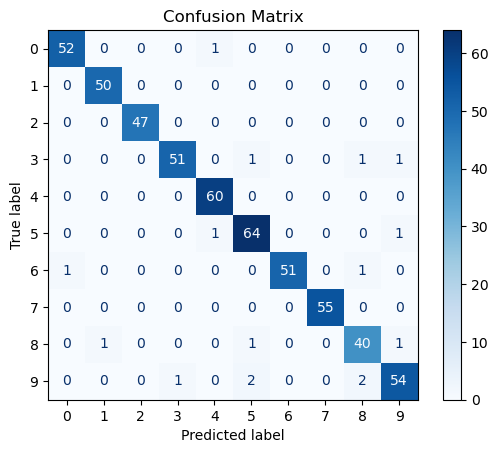

Feature Importances for RandomForestClassifier:
[0.1492456385421687, 0.13063569420490123, 0.09066943164056183, 0.08643418988358428, 0.07357717006013588, 0.05233598736444292, 0.041377017864976, 0.04105597863722111, 0.03673088641232159, 0.027484128971519337, 0.014806933386252006, 0.01331571449157322, 0.011807897167241992, 0.011497798261364536, 0.010626964085272987, 0.009694664812549944, 0.009515248126892216, 0.009258371908508837, 0.009081963972191735, 0.009074654175995973, 0.008757324045806248, 0.00676610911228562, 0.0061692628825669475, 0.006096521446080304, 0.006034513912767721, 0.005703889361664996, 0.005539460310553753, 0.005522995183218599, 0.005421933160210042, 0.005297230950417627, 0.005283037067853409, 0.005268607215689131, 0.005145935187017454, 0.0050999308613204454, 0.004724809845273569, 0.004679197351004431, 0.004527865226676659, 0.004266987866642345, 0.003953562048619993, 0.0037888523225455607, 0.0035937346983013446, 0.0033695699061912854, 0.003346185728006848, 0.003343330668

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Params: OrderedDict({'model__bootstrap': False, 'model__criterion': 'entropy', 'model__max_depth': 15, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7, 'model__n_estimators': 200, 'pca__n_components': 42, 'scaler__with_mean': True, 'scaler__with_std': False})
Best Score (Train): 0.9622687907641063
Test Score: 0.9690487858337298
--------------------------------------------------------------------------------
Classification Report for RandomForestClassifier with precision_macro:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       0.96      0.93      0.94        54
           4       0.98      1.00      0.99        60
           5       0.94      0.94      0.94        66
           6       1.00      0.96      0.98        53
           7       0.98      1.00      0.99        55
           8 

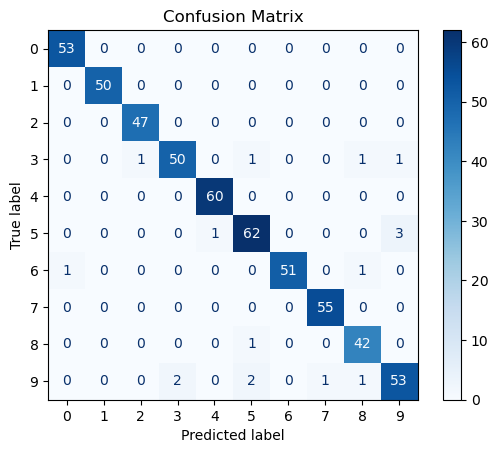

Feature Importances for RandomForestClassifier:
[0.1725975854463722, 0.13375883473015657, 0.09620297271609869, 0.0917065450716867, 0.07478037672672662, 0.06018690524216133, 0.04307635523884257, 0.04251900224500537, 0.04096698833732857, 0.02948298746331579, 0.01782168546865099, 0.0148980524365221, 0.013643526506231407, 0.013530987854068607, 0.013354869230823053, 0.012747150817581284, 0.010964464424762137, 0.008387899589542855, 0.008288070752775557, 0.008107754200857136, 0.006729408052491291, 0.006644171817270276, 0.006504472103556266, 0.0065043103066695016, 0.00621682619334201, 0.005186436964925173, 0.004968572189426052, 0.004623557047660637, 0.004543339814962554, 0.0044957408240898136, 0.004190939331730606, 0.003984079718902089, 0.0034151907142967682, 0.0031941137845541965, 0.003120112838515311, 0.0031095282467512933, 0.00303660057918879, 0.0028612566544294893, 0.002707998605511912, 0.002664232857756601, 0.0022980886123790283, 0.0019780082420809884]
------------------------------------

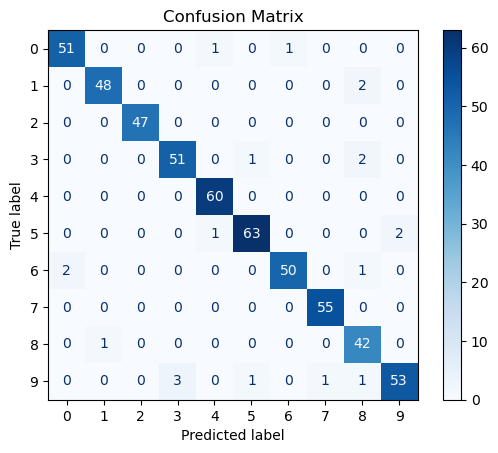

Feature Importances for RandomForestClassifier:
[0.11764745149723912, 0.11510021196779135, 0.07405028453713097, 0.0636145542283419, 0.059725934184188735, 0.04290244109306039, 0.03565737257212422, 0.03542824985043814, 0.03514809550792357, 0.024553001045822632, 0.014221978924578802, 0.0140922997275573, 0.013718978328042062, 0.01339249274855284, 0.012684875355387362, 0.012497325272758002, 0.011827615130669997, 0.011275940877749628, 0.010711921023390504, 0.010417178681664259, 0.009604031224367949, 0.00937825111318885, 0.009327439836169647, 0.008769065972977573, 0.008504940704760837, 0.008463998071921667, 0.008424461672486288, 0.008400205621033673, 0.008277204820419656, 0.008242006585481697, 0.008227005905895942, 0.008131850054509858, 0.008094381763303257, 0.007931268423482152, 0.007873342330921958, 0.007537858015813395, 0.006588207093224048, 0.006430092939995317, 0.006422104925394042, 0.0064065689456283955, 0.006254625121945174, 0.006148437888388043, 0.006108338274813898, 0.006010959102652

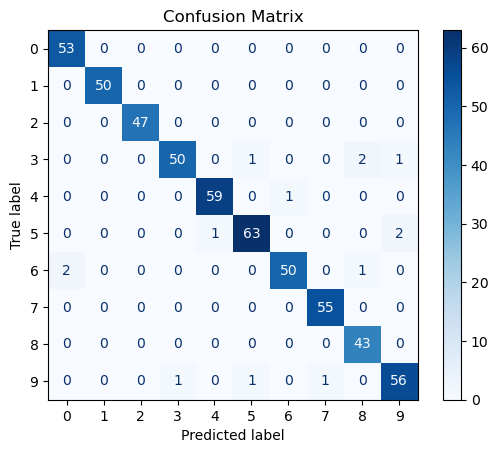

Feature Importances for RandomForestClassifier:
[0.15277590136037403, 0.1521002086009341, 0.09467163016010202, 0.08094322187016928, 0.07566205372094842, 0.052528178539929644, 0.0491388766323792, 0.04820537744362221, 0.04788122390208883, 0.03185819480346168, 0.02228589159724701, 0.021105876384191712, 0.020049220782119313, 0.019995397099946882, 0.018932767815380027, 0.01721803878334925, 0.015609806106060187, 0.015177872452989915, 0.013970329010456618, 0.012810141727029243, 0.012631843575583121, 0.012431389273368166, 0.012016558358269161]
--------------------------------------------------------------------------------
Evaluating RandomForestClassifier with scoring metric: accuracy
Evaluating RandomForestClassifier with scoring metric: f1_macro
Evaluating RandomForestClassifier with scoring metric: balanced_accuracy
Evaluating RandomForestClassifier with scoring metric: precision_macro
Evaluating RandomForestClassifier with scoring metric: recall_macro
Evaluating RandomForestClassifier wit

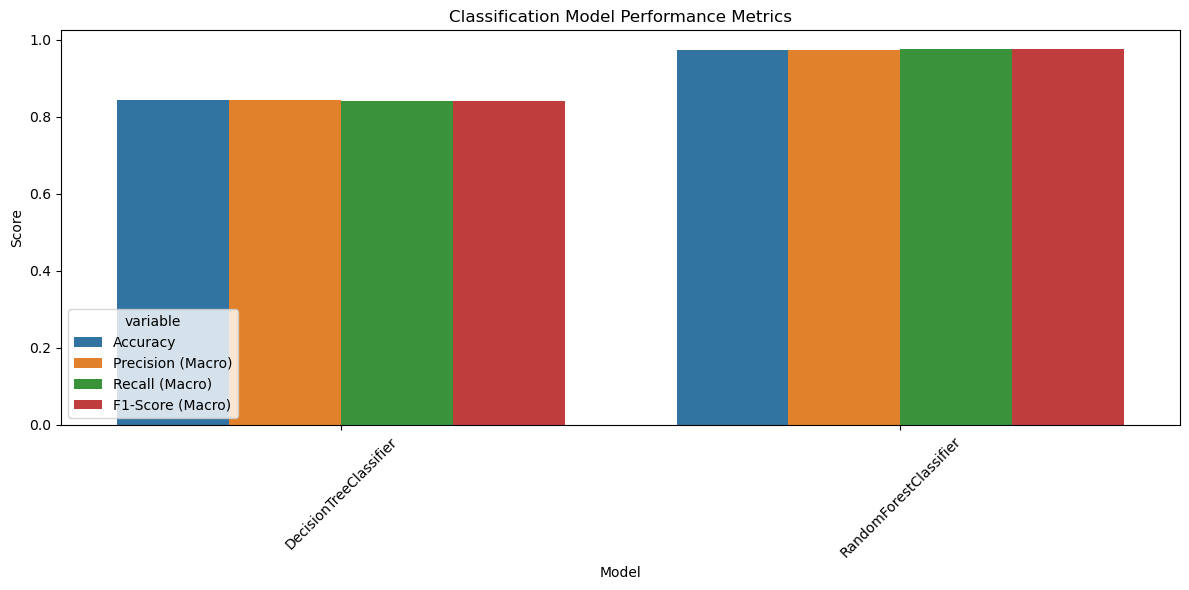

Model     Scoring Metric            Task  Accuracy  \
0   DecisionTreeClassifier           accuracy  Classification  0.842593   
1   DecisionTreeClassifier           f1_macro  Classification  0.842593   
2   DecisionTreeClassifier  balanced_accuracy  Classification  0.842593   
3   DecisionTreeClassifier    precision_macro  Classification  0.842593   
4   DecisionTreeClassifier       recall_macro  Classification  0.842593   
5   DecisionTreeClassifier  average_precision  Classification  0.842593   
6   DecisionTreeClassifier  average_precision  Classification  0.842593   
7   RandomForestClassifier           accuracy  Classification  0.974074   
8   RandomForestClassifier           f1_macro  Classification  0.974074   
9   RandomForestClassifier  balanced_accuracy  Classification  0.974074   
10  RandomForestClassifier    precision_macro  Classification  0.974074   
11  RandomForestClassifier       recall_macro  Classification  0.974074   
12  RandomForestClassifier  average_precision  Classification  0.974074   
13  RandomForestClassifier  average_precision  Classification  0.974074   

    Precision (Macro)  Recall (Macro)  F1-Score (Macro)  
0            0.844725        0.841556           0.84147  
1            0.844725        0.841556           0.84147  
2            0.844725        0.841556           0.84147  
3            0.844725        0.841556           0.84147  
4            0.844725        0.841556           0.84147  
5            0.844725        0.841556           0.84147  
6            0.844725        0.841556           0.84147  
7            0.974306        0.975635           0.97470  
8            0.974306        0.975635           0.97470  
9            0.974306        0.975635           0.97470  
10           0.974306        0.975635           0.97470  
11           0.974306        0.975635           0.97470  
12           0.974306        0.975635           0.97470  
13           0.974306        0.975635           0.97470

In [21]:
tuner = ModelTuner(models_param_spaces, scoring_criteria)
tuner.tune_all_models('classification', 'bayesian', X_train_clf, y_train_clf, X_test_clf, y_test_clf)

--Regression EDA Work--


Univariate and Bivariate Analysis

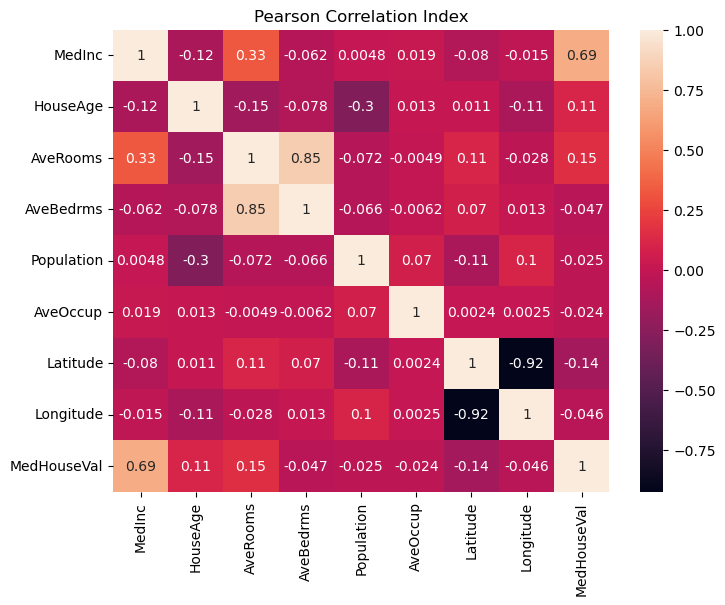

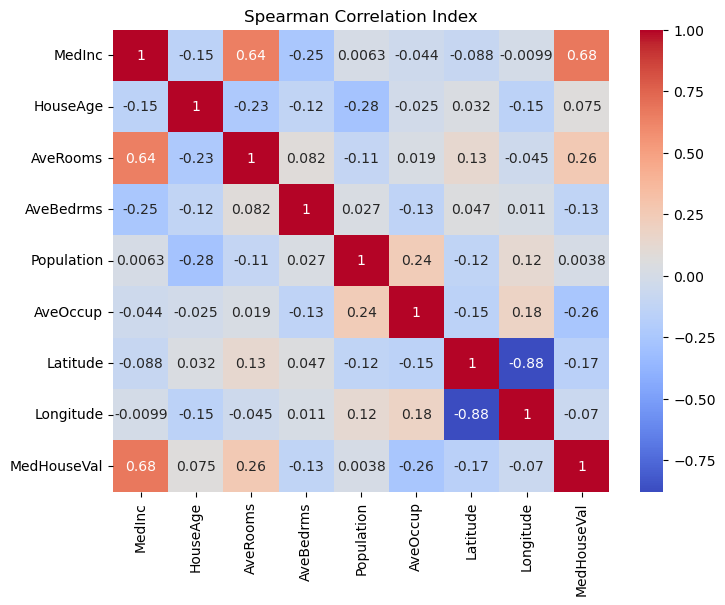

In [22]:
def BivariateAnalysis(df):
    Pearson=df.corr(method='pearson')
    Spearman=df.corr(method='spearman')
    plt.figure(figsize=(8,6))
    sns.heatmap(Pearson, annot=True)
    plt.title("Pearson Correlation Index")
    plt.show()
    plt.figure(figsize=(8,6))
    sns.heatmap(Spearman, annot=True, cmap='coolwarm')
    plt.title('Spearman Correlation Index')
    plt.show()
BivariateAnalysis(df_housing)

(20640, 8)
862
844
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


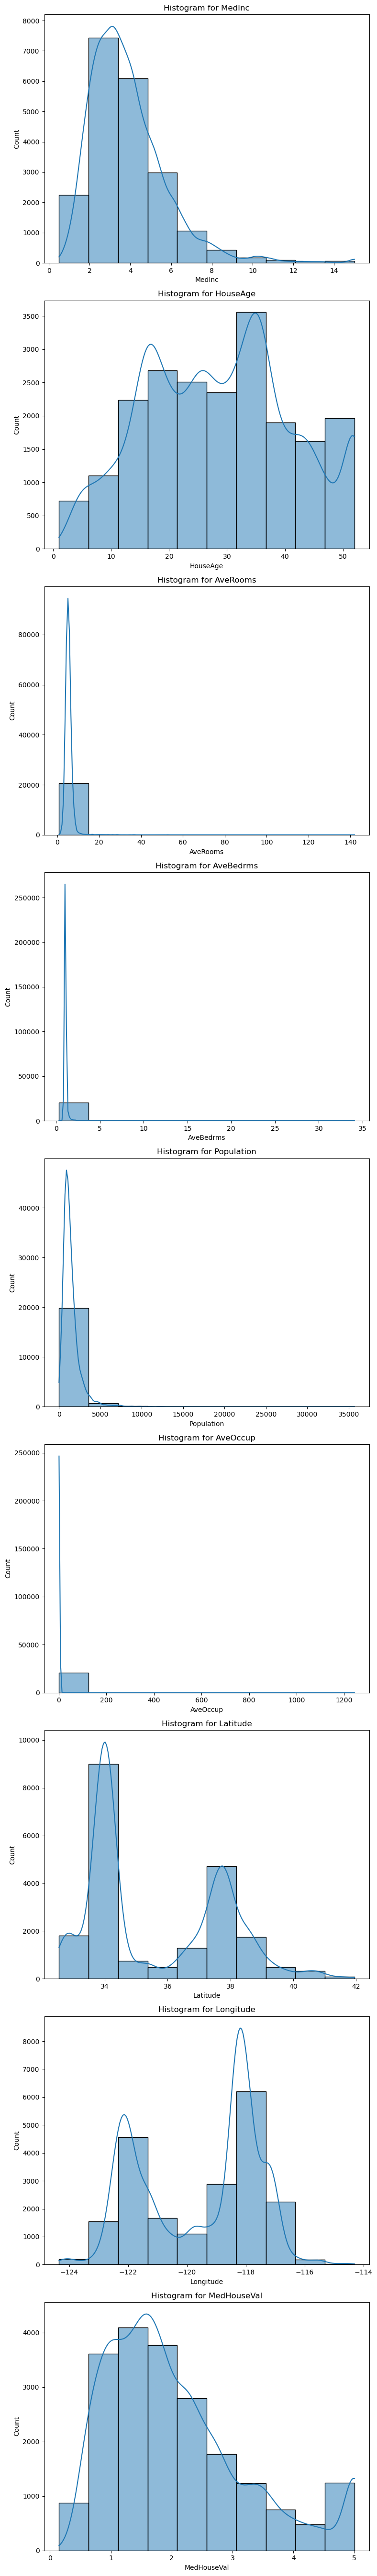

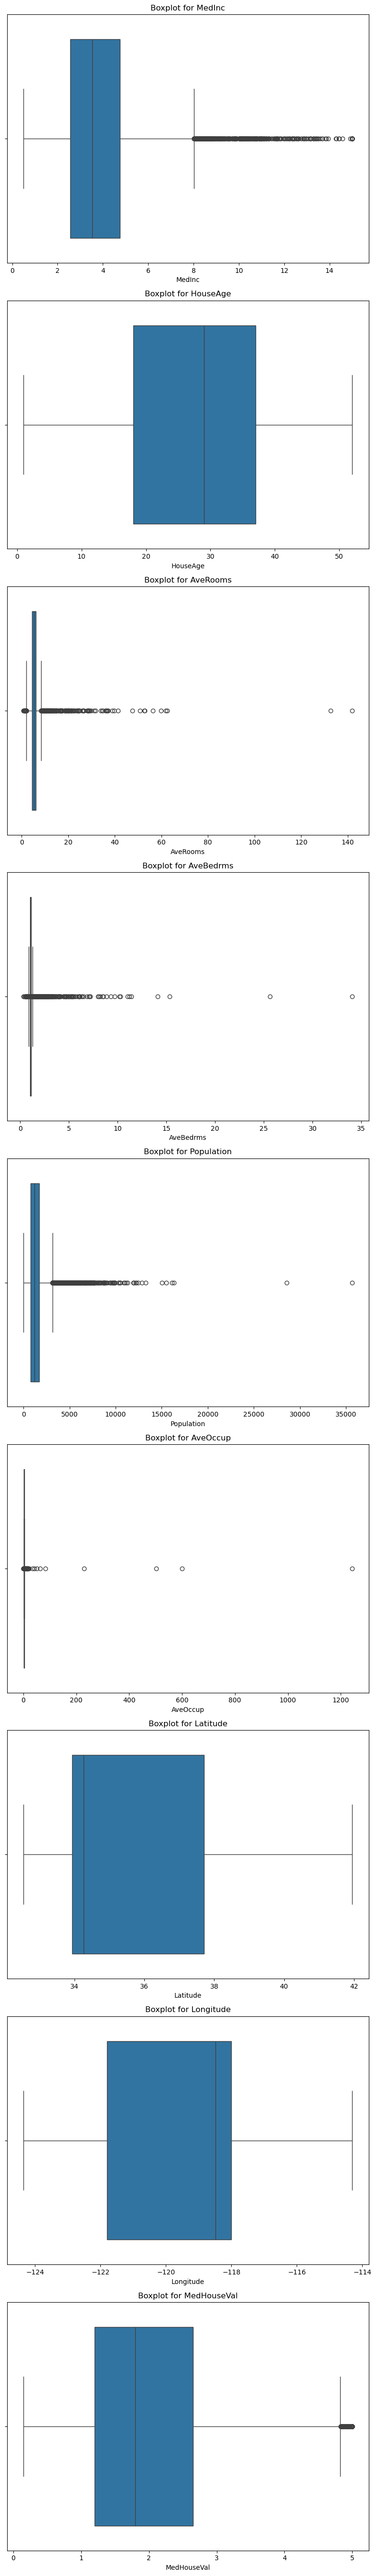

In [23]:
cal_df = fetch_california_housing(as_frame=True).data
def UnivariateAnalysis(df):
    columns = df.columns
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 6 * n))
    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, bins=10, ax=axes[i])
        axes[i].set_title(f'Histogram for {col}')
    plt.tight_layout()
    plt.show()


    fig, axes = plt.subplots(n, 1, figsize=(8, 6 * n))
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()
print(cal_df.shape)
print(cal_df['Latitude'].nunique())
print(cal_df['Longitude'].nunique())
print(cal_df.head())
print(cal_df.isnull().sum())

UnivariateAnalysis(df_housing)

Pairplots demonstrating positive and negative correlation between variables

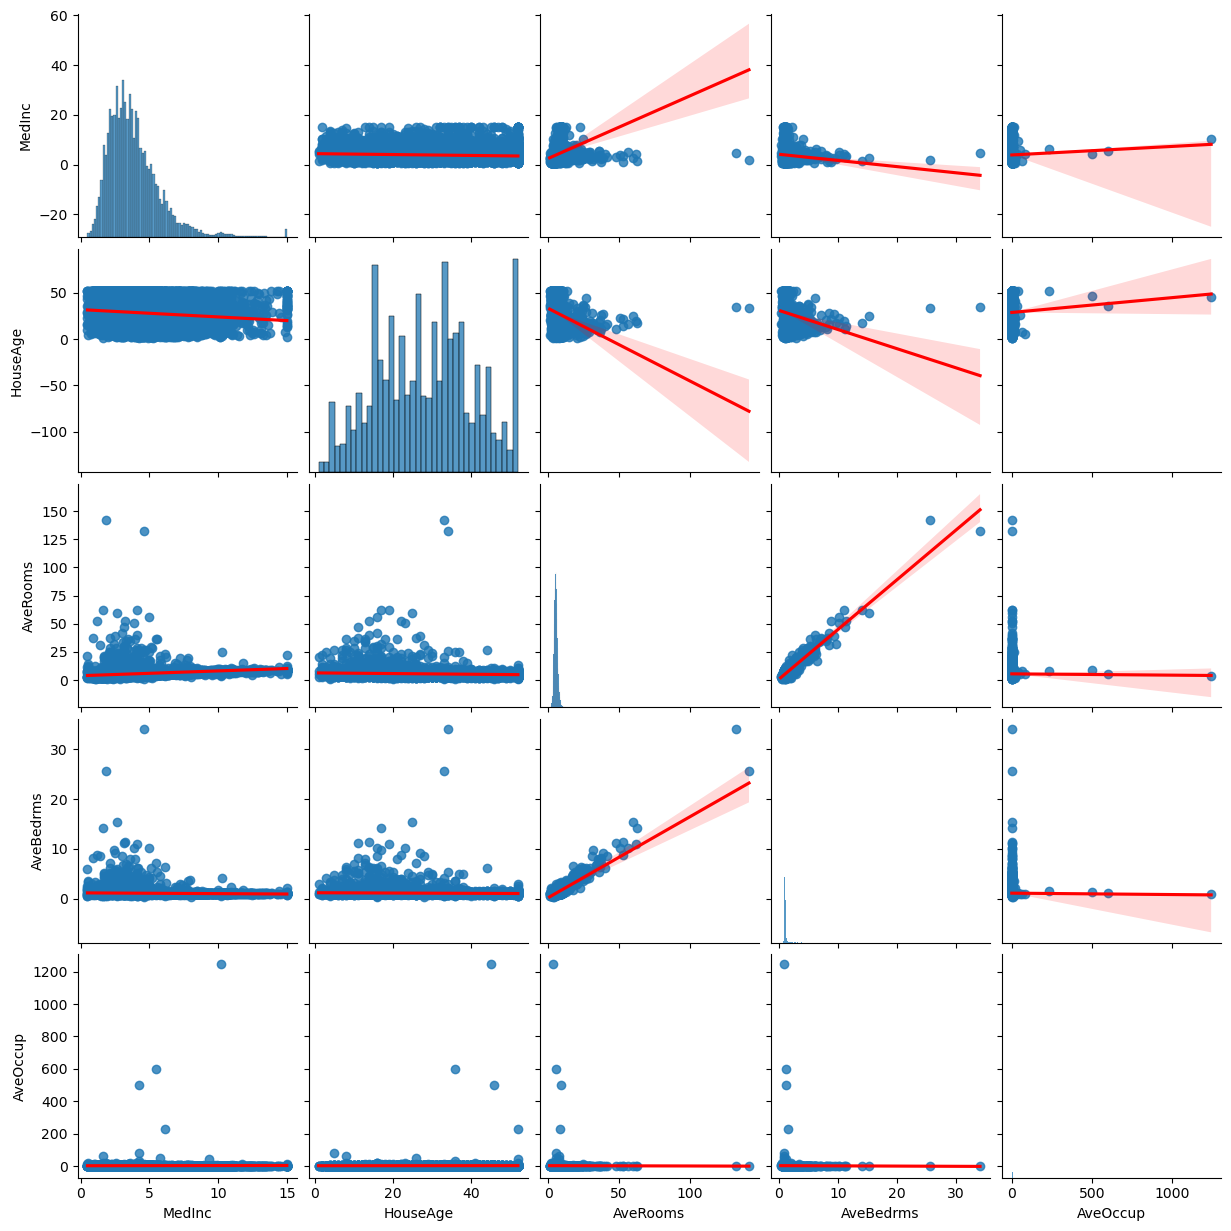

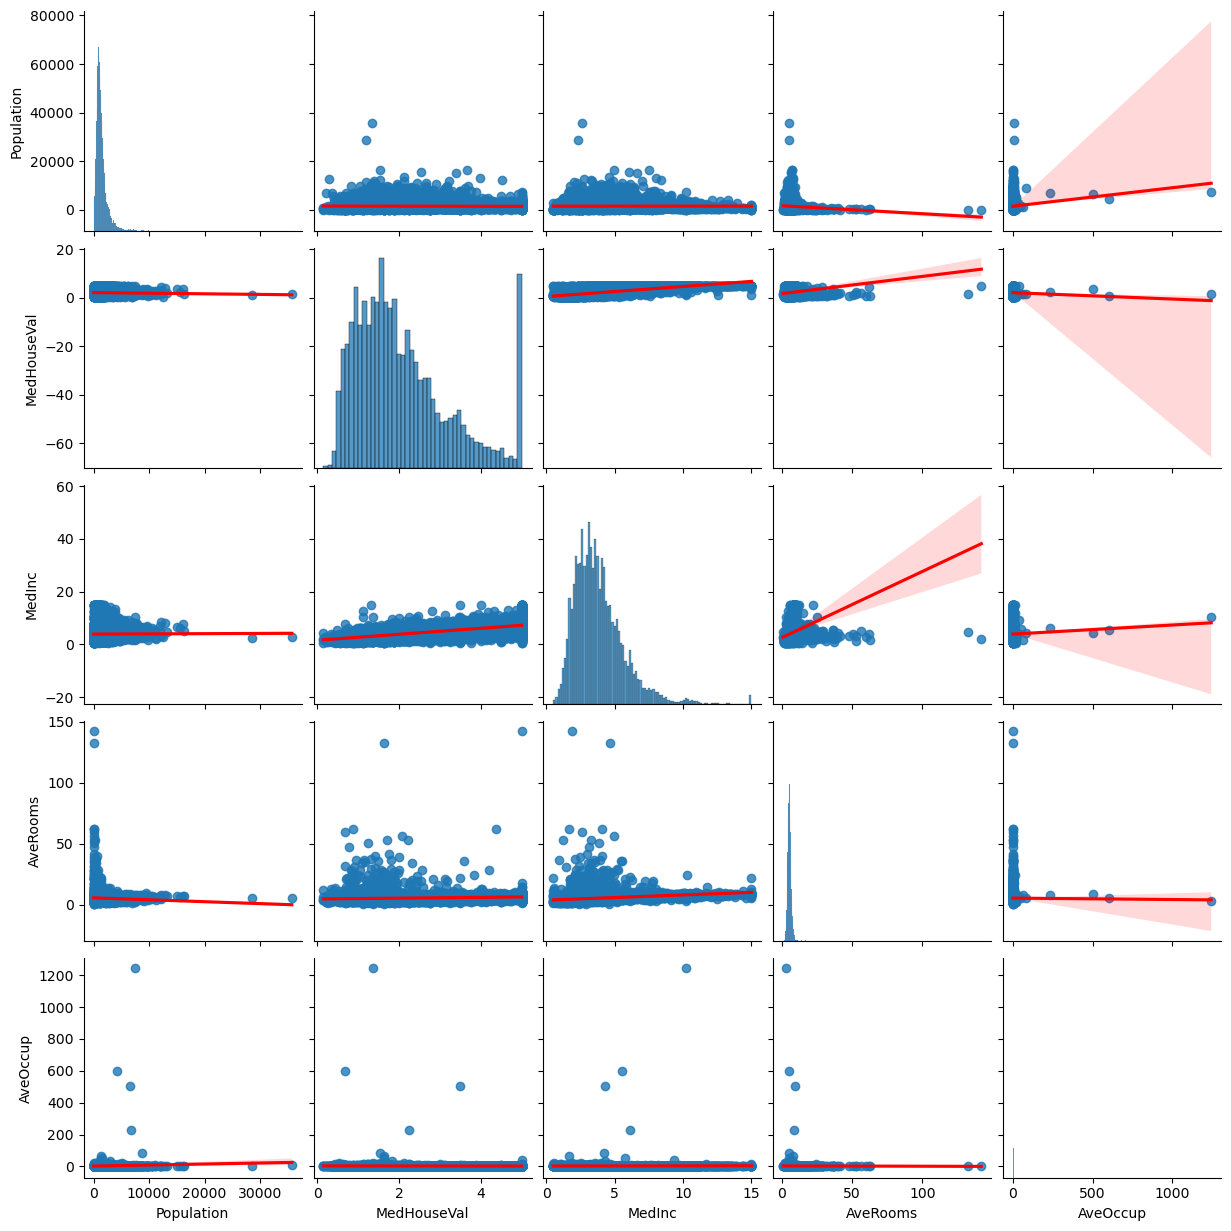

In [24]:
def PairPlots(df):
  sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color': 'red'}})
  plt.show()

selected=df_housing.drop(columns=['Latitude','Longitude','Population','MedHouseVal'])
PairPlots(selected)

Population=df_housing[['Population','MedHouseVal','MedInc','AveRooms','AveOccup']]
sns.pairplot(Population,kind='reg', plot_kws={'line_kws':{'color': 'red'}})
plt.show()

Outlier Detection Methods and Function comparing each

Mean Squared Error for Random Forest for 1: 2.3198669904910507e-06
R2 Score for Random Forest for 1: 0.9999981745114406
Mean Squared Error for Decision Tree for 1: 4.5500982318271115e-06
R2 Score for Decision Tree for 1: 0.9999964195566812
Mean Squared Error for Random Forest for 2: 2.7828886506708467e-05
R2 Score for Random Forest for 2: 0.9999912280020068
Mean Squared Error for Decision Tree for 2: 5.590520854166666e-05
R2 Score for Decision Tree for 2: 0.9999823780093746
Mean Squared Error for Random Forest for 3: 3.038765468868361e-06
R2 Score for Random Forest for 3: 0.9999988326248184
Mean Squared Error for Decision Tree for 3: 1.3627020785219466e-05
R2 Score for Decision Tree for 3: 0.9999947650300665


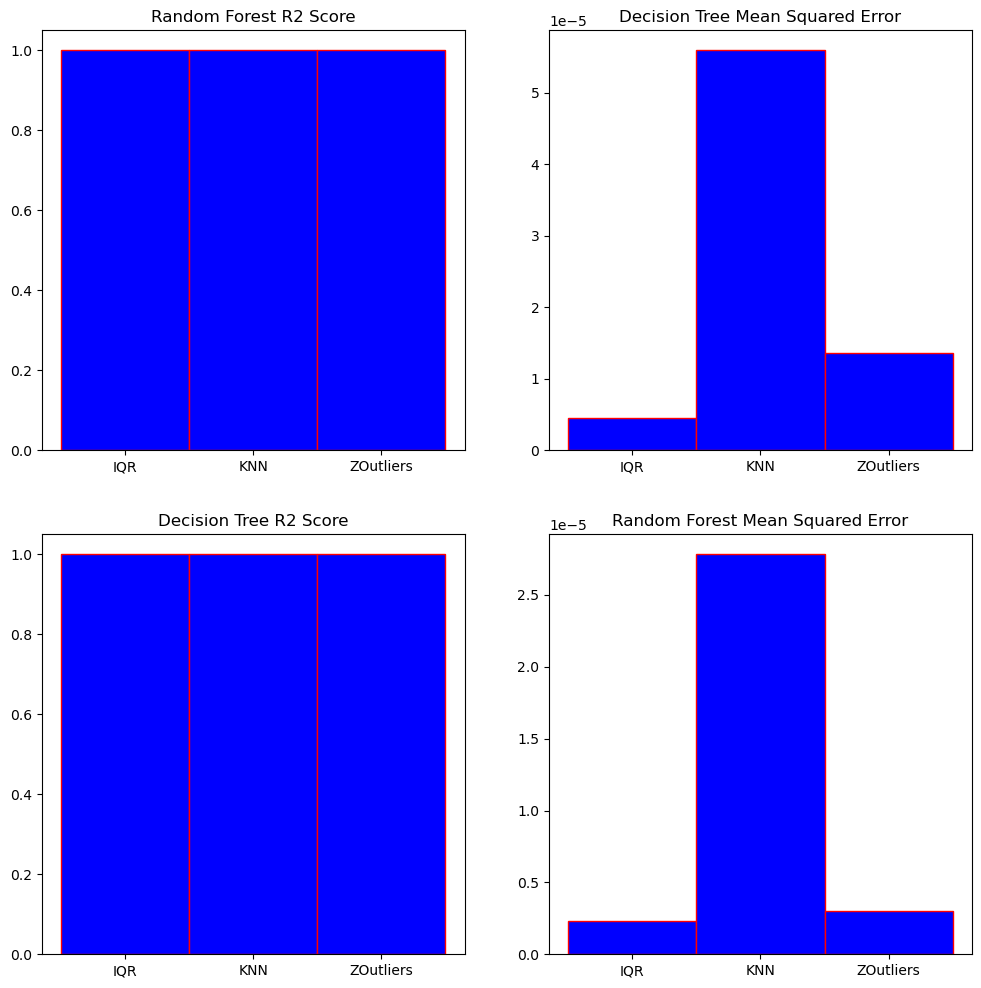

In [25]:
def ZOutliers(df):
  zdf=df.copy()
  outliers=pd.DataFrame()
  for col in zdf.columns:
    zscore=stats.zscore(zdf[col])
    zdf[f'{col}_zscore']=zscore
    mask=zdf[f'{col}_zscore'].abs()<2.5
    zdf=zdf[mask]
    # outliers.drop_duplicates(inplace=True)
    # z_score_columns=[col for col in outliers.columns if col.endswith('_zscore')]
    # outliers=outliers.drop(columns=z_score_columns)
    # outliers.to_csv('outliers.csv', index=False)
    zdf.drop(columns=[f'{col}_zscore'], inplace=True)

  return zdf
def OutlierDetection(df):
  clean_df=df.copy()
  outliers=pd.DataFrame()
  for col in clean_df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    mask=(df[col] >= lower) & (df[col]<=upper)
    clean_df=clean_df[mask]
  return clean_df
def KNNOutliers(df):
  df1=df.copy()
  combinedoutliers=pd.DataFrame()
  for col in df.columns:
    k=20
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(df1.iloc[:,1:9], df1[col])
    distances,indeces=knn.kneighbors(df1.iloc[:,1:9])
    df1[f'outlierscore for {col}']=np.mean(distances, axis=1)
    threshold=np.percentile(np.mean(distances, axis=1), 95)
    mask=df1[f'outlierscore for {col}']<threshold
    df1=df1[mask]
    df1.drop(columns=f'outlierscore for {col}', inplace=True)
  return df1

class OutlierHandling(BaseEstimator, TransformerMixin):
  def __init__(self, method='KNN'):
    self.method=method

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    if self.method=='KNN':
      return KNNOutliers(X)
    elif self.method=='Z':
      return ZOutliers(X)
    elif self.method=='IQR':
      return OutlierDetection(X)
    else:
      raise ValueError("Invalid outlier detection method")
    
def outliertest(df):
  KNN=KNNOutliers(df)
  Z=ZOutliers(df)
  IQR=OutlierDetection(df)
  Outliers=[KNN,Z,IQR]
  regressionresults={}
  for i, outlier in enumerate(Outliers):
    outlier_indeces=outlier.index.tolist()
    outlier_indeces=[idx for idx in outlier_indeces if idx in df.index]
    cleandf=df.drop(index=outlier_indeces)
    X=cleandf.iloc[:,1:9].values
    y=cleandf['MedHouseVal'].values
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
    clf=RandomForestRegressor()
    CLFDT=DecisionTreeRegressor()
    clf.fit(x_train,y_train)
    CLFDT.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    y_predDT=CLFDT.predict(x_test)
    print(f"Mean Squared Error for Random Forest for {i + 1}: {mean_squared_error(y_test,y_pred)}")
    print(f"R2 Score for Random Forest for {i + 1}: {r2_score(y_test,y_pred)}")
    print(f"Mean Squared Error for Decision Tree for {i + 1}: {mean_squared_error(y_test,y_predDT)}")
    print(f"R2 Score for Decision Tree for {i + 1}: {r2_score(y_test,y_predDT)}")
    regressionresults[f"Outlier Method {i + 1}"] = {
        "RandomForest": {
            "Mean Squared Error": mean_squared_error(y_test, y_pred),
            "R2 Score": r2_score(y_test, y_pred)
        },
        "DecisionTree": {
            "Mean Squared Error": mean_squared_error(y_test, y_predDT),
            "R2 Score": r2_score(y_test, y_predDT)
        }
    }
  random_mse=[regressionresults[method]['RandomForest']['Mean Squared Error'] for method in regressionresults]
  random_r2=[regressionresults[method]['RandomForest']['R2 Score'] for method in regressionresults]
  decision_mse=[regressionresults[method]['DecisionTree']['Mean Squared Error'] for method in regressionresults]
  decision_r2=[regressionresults[method]['DecisionTree']['R2 Score'] for method in regressionresults]
  fig,ax=plt.subplots(2,2, figsize=(12,12))
  plt.bar(['IQR','KNN','ZOutliers'],random_mse,width=1, edgecolor='red', color='blue')
  plt.title('Random Forest Mean Squared Error')
  plt.subplot(2,2,1)
  plt.bar(['IQR','KNN','ZOutliers'],random_r2,width=1, edgecolor='red', color='blue')
  plt.title('Random Forest R2 Score')
  plt.subplot(2,2,2)
  plt.bar(['IQR','KNN','ZOutliers'],decision_mse,width=1, edgecolor='red', color='blue')
  plt.title('Decision Tree Mean Squared Error')
  plt.subplot(2,2,3)
  plt.bar(['IQR','KNN','ZOutliers'],decision_r2,width=1, edgecolor='red', color='blue')
  plt.title('Decision Tree R2 Score')
  plt.subplot(2,2,4)
  plt.show()
outliertest(df_housing)

Histograms for House Age

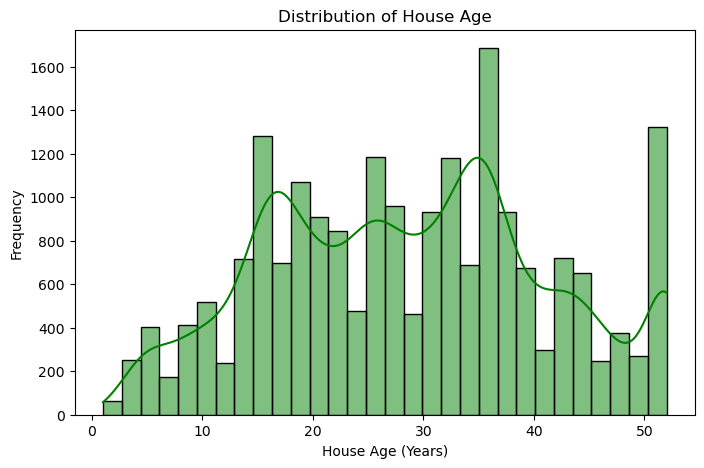

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df_housing['HouseAge'], kde=True, color='green', bins=30)
plt.title("Distribution of House Age")
plt.xlabel("House Age (Years)")
plt.ylabel("Frequency")
plt.show()

Log Transformation of Median House Value

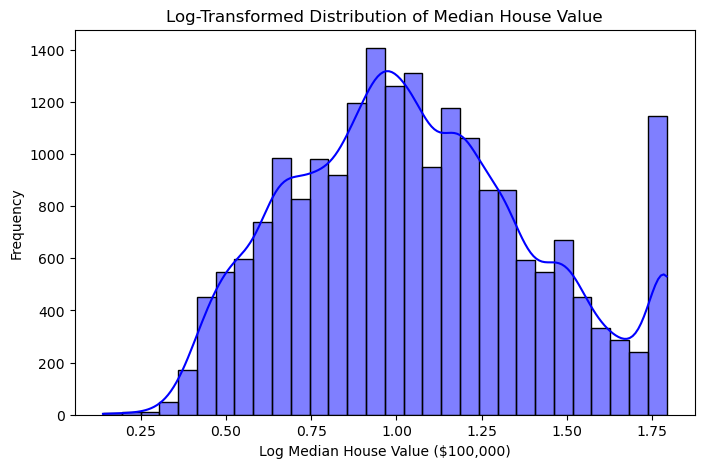

In [27]:

df_housing['MedHouseVal_log'] = np.log1p(df_housing['MedHouseVal'])

plt.figure(figsize=(8, 5))
sns.histplot(df_housing['MedHouseVal_log'], kde=True, color='blue', bins=30)
plt.title("Log-Transformed Distribution of Median House Value")
plt.xlabel("Log Median House Value ($100,000)")
plt.ylabel("Frequency")
plt.show()

Plot the boxplot of the log-transformed median house value by median income quintiles


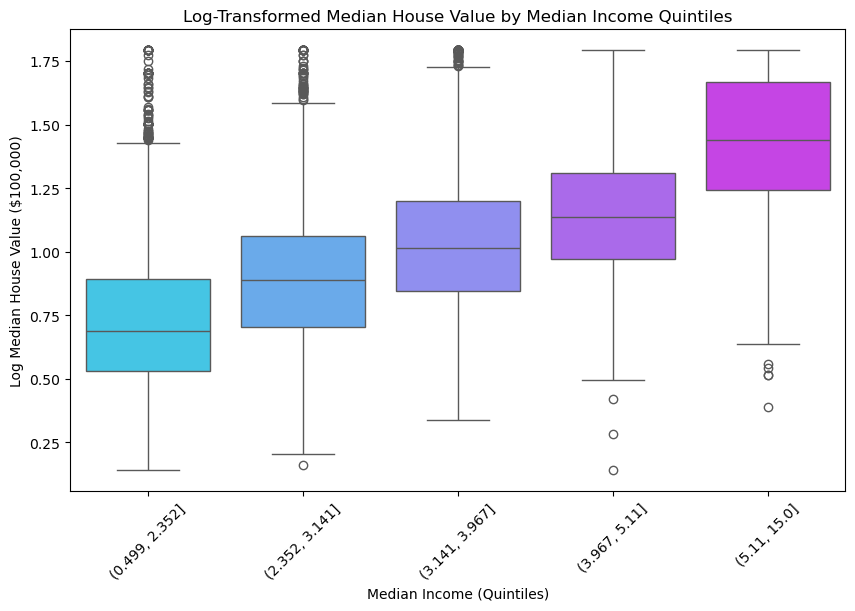

In [28]:


df_housing['MedInc_quintile'] = pd.qcut(df_housing['MedInc'], 5)

plt.figure(figsize=(10, 6))
sns.boxplot(x='MedInc_quintile', y='MedHouseVal_log', data=df_housing, palette="cool")
plt.title("Log-Transformed Median House Value by Median Income Quintiles")
plt.xlabel("Median Income (Quintiles)")
plt.ylabel("Log Median House Value ($100,000)")
plt.xticks(rotation=45)
plt.show()

Watson's GeoPandas Work

Configure Utilities

In [29]:

np.set_printoptions(suppress=True, precision=5)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Load Data

In [30]:
'''Load Data'''
common_crs = "EPSG:4269"
coastline_shp = './geoData/califorina_pacific_coast-shapefile/3853-s3_2002_s3_reg_pacific_ocean.shp'
places_shp = './geoData/ca_places/CA_Places.shp'
counties_shp = './geoData/us_county/tl_2023_us_county.shp'
# counties_shp = './geoData/ca_counties/CA_Counties.shp'


coastline = gpd.read_file(coastline_shp)
places = gpd.read_file(places_shp)
counties = gpd.read_file(counties_shp)

rawData = fetch_california_housing(as_frame=True)
cal_housing_geo = gpd.GeoDataFrame(rawData.data, geometry=gpd.points_from_xy(rawData.data.Longitude, rawData.data.Latitude), crs=common_crs)
cal_housing_geo['y'] = rawData.target

Standardize Coordinate Projection

In [31]:
coastline = coastline.to_crs(common_crs)
places = places.to_crs(common_crs)
counties = counties.to_crs(common_crs)

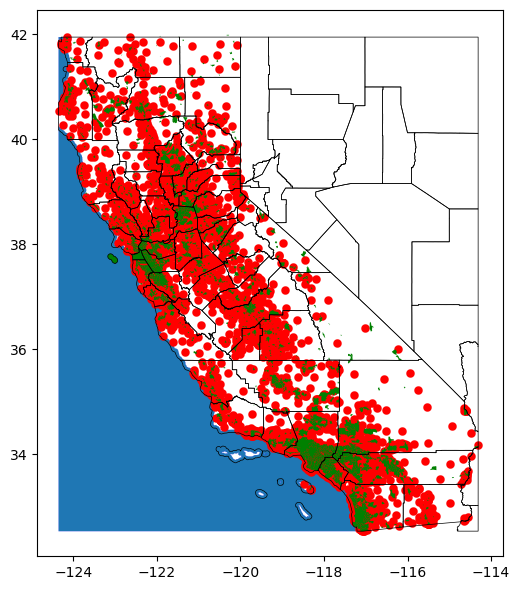

In [32]:
# Set Geo Bounding Box and Plot

housing_bounds = cal_housing_geo.total_bounds
counties = counties.clip(housing_bounds)
coastline = coastline.clip(housing_bounds)
fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)

coastline.plot(ax=ax, edgecolor='blue', linewidth=0.1)
counties.boundary.plot(ax=ax, edgecolor='black', linewidth=.5)
cal_housing_geo.plot(ax=ax, color='red', linewidth=0.1)
places.plot(ax=ax, color='green', linewidth=1.0)
plt.show()

Feature Engineer From Coast

In [33]:
house_to_coast = gpd.sjoin_nearest(cal_housing_geo, coastline, how="left", distance_col="meters")
cal_housing_geo['m_to_coast'] = house_to_coast['meters']

Feature Engineer Distance from Census Designated Place

In [34]:

house_to_interest = gpd.sjoin_nearest(cal_housing_geo, places, how="left", distance_col="meters")
# cal_housing_geo['CDP'] = house_to_interest['NAME'] // The name of the CDP does not appear to impact model performance
cal_housing_geo['m_to_CDP'] = house_to_interest['meters']

Feature Engineer County Data

In [35]:
# Color Code Counties by Target Value
cal_housing_geo = gpd.GeoDataFrame(rawData.data, geometry=gpd.points_from_xy(rawData.data.Longitude, rawData.data.Latitude), crs=common_crs)
cal_housing_geo['y'] = rawData.target

house_to_county = gpd.sjoin_nearest(cal_housing_geo, counties, how="left")
cal_housing_geo['county_name'] = house_to_county['NAME']


Add Mean Target Value to County Data

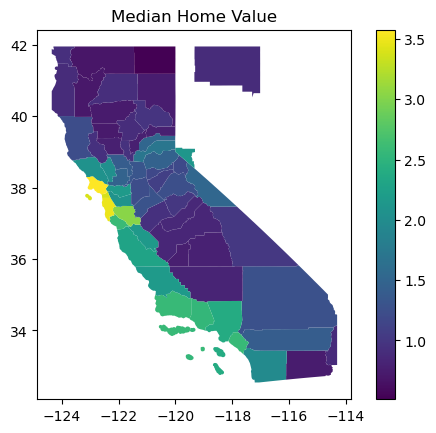

In [36]:
meanTarget = cal_housing_geo.groupby('county_name')['y'].mean().reset_index()

def setMeanTarget(row):
    value = meanTarget[meanTarget['county_name'] == row['NAME']]['y'].array
    row['mean_target'] = value[0] if len(value) else None
    return row

withTarget = counties.apply(setMeanTarget, axis=1)
withTarget.dropna(subset='mean_target')

withTarget.plot(column='mean_target', legend=True)
plt.title('Median Home Value')

cal_housing_geo = encode(cal_housing_geo, ['county_name'])

Run Default Regressor Timeline to determine Feature Importance

In [37]:
# modelData = cal_housing_geo.drop(columns=['y', 'geometry', 'Latitude', 'Longitude'])
# X_train, X_test, y_train, y_test = train_test_split(modelData, rawData.target, test_size=0.3, random_state=42)

# pipe = Pipeline([('scaler', StandardScaler()),('regress',RandomForestRegressor())], verbose=True)
# predicted = pipe.fit(X_train, y_train).predict(X_test)

# mse = mean_squared_error(y_test, predicted)
# print(mse)

# regressor = pipe.steps[-1][-1]

# feat_importance = list(zip(modelData.columns,regressor.feature_importances_))
# feat_importance = sorted(feat_importance, key=lambda tup: tup[1])

# feat=[x for x,y in feat_importance]
# importance=[y for x,y in feat_importance]


# plt.title('Feature Importances')
# sns.barplot(y=feat[-8:], x=importance[-8:])

Mike's GeoPandas Work

Load School District Information and plot 

In [38]:

schoolsfile='./geoData/DistrictAreas/DistrictAreas2122.shp'
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
schools=gpd.read_file(schoolsfile)
# schools.to_crs(common_crs)
schools['unique_id'] = range(1, len(schools) + 1)

# print(schools.info())
# print(schools.nunique())



zip latitude and longitude together to facilitate sJoin

In [39]:
# latlong = [Point(xy) for xy in zip(cal_df['Longitude'], cal_df['Latitude'])]
# new_df = gpd.GeoDataFrame(cal_df, geometry=latlong)
# This is covered in cal_housing_geo already


Plot xy coordinates over district map

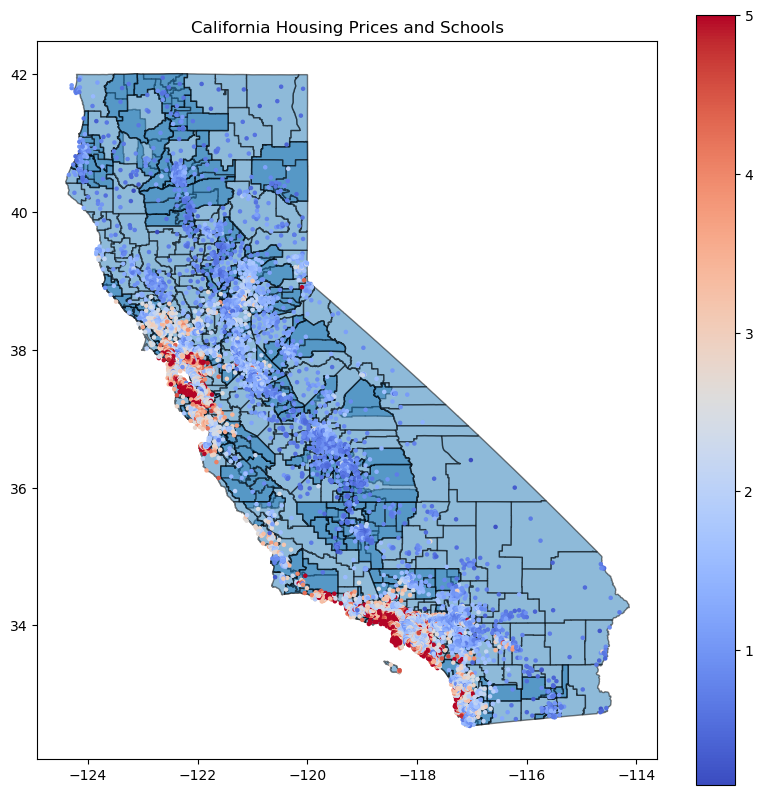

In [40]:
schools = schools.to_crs(common_crs)
ax=schools.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
cal_housing_geo.plot(ax=ax, column='y', cmap='coolwarm', markersize=5, legend=True)
plt.title('California Housing Prices and Schools')
plt.show()

SJoin Cal Housing dataset with School districts, and build new features based upon median income per district and population density for each district.

In [41]:
joineddf=gpd.sjoin(schools, cal_housing_geo, how='left', predicate='intersects')

# print(joineddf.nunique())
# print(joineddf.isnull().sum())
# print(joineddf.duplicated(subset='unique_id').sum())


joineddf['schooldistrictmedianincome']=joineddf.groupby('unique_id')['MedInc'].transform('mean')
joineddf['populationdensity']=joineddf.groupby('unique_id')['Population'].transform('mean')
joineddf=joineddf.dropna()
print(joineddf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 8799 entries, 0 to 939
Columns: 126 entries, Year to populationdensity
dtypes: float64(88), geometry(1), int64(19), object(18)
memory usage: 8.5+ MB
None


Run each feature over the district map

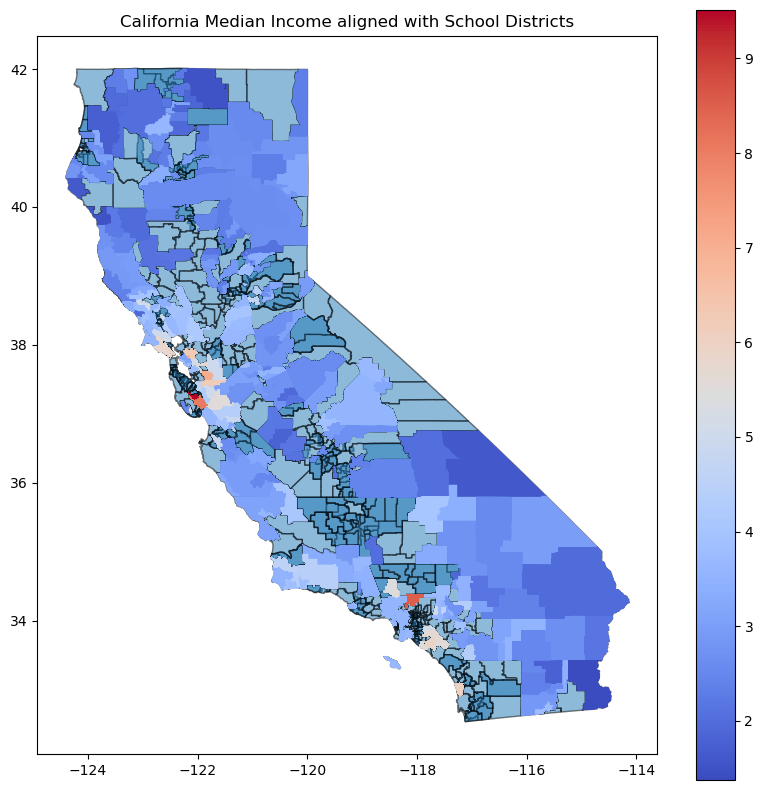

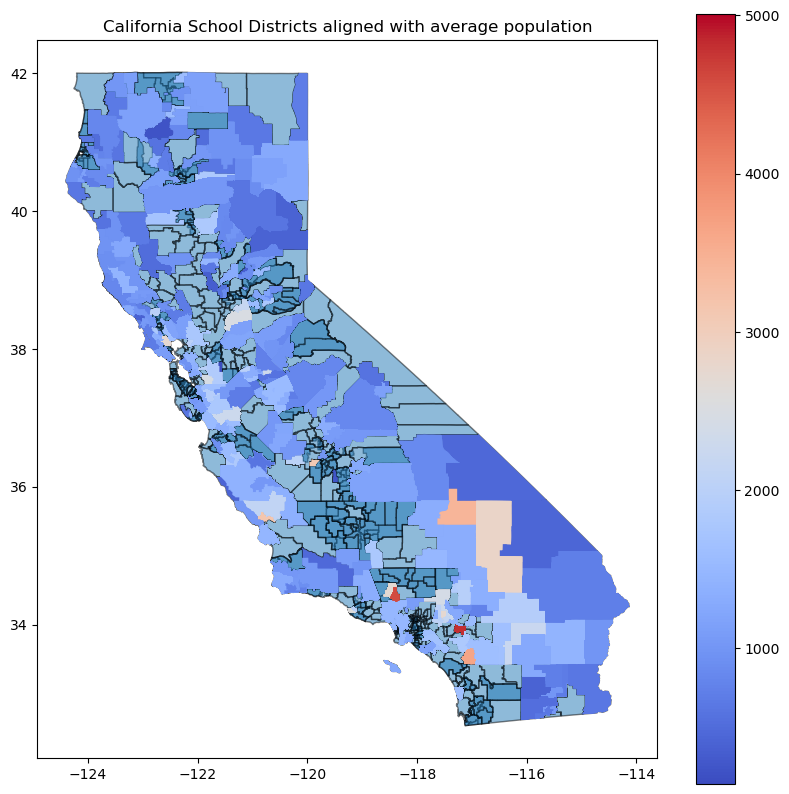

In [42]:
ax=schools.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
joineddf.plot(ax=ax, column='schooldistrictmedianincome', cmap='coolwarm', markersize=5, legend=True)
plt.title('California Median Income aligned with School Districts')
plt.show()
ax=schools.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
joineddf.plot(ax=ax, column='populationdensity', cmap='coolwarm', markersize=5, legend=True)
plt.title('California School Districts aligned with average population')
plt.show()

Run default Decision Tree and Random Forest Classifiers to determine feature importance

In [47]:
modelData = cal_housing_geo.drop(columns=['Longitude','geometry','Latitude'])
# Scoring criteria
scoring_criteria = {
    'regression': ['r2', 'neg_mean_squared_error'] # 'neg_mean_absolute_error', 'neg_median_absolute_error', 'max_error', 'explained_variance', 'neg_root_mean_squared_error'
}

# Classifier and regressor parameter spaces
models_param_spaces = {
    'DecisionTreeRegressor': {
        'bayesian': {
            'model__criterion': Categorical(['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'model__splitter': Categorical(['best', 'random']),
            'model__max_depth': Integer(2, 20),
            'model__min_samples_split': Integer(2, 10),
            'model__min_samples_leaf': Integer(1, 10),
            'pca__n_components': Integer(1, len(modelData.columns)-1),
            'scaler__with_mean': [True, False],
            'scaler__with_std': [True, False],
        }
    },
    'RandomForestRegressor': {
        'bayesian': {
            'model__n_estimators': [50, 100, 200, 300],
            'model__criterion': Categorical(['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'model__max_depth': Integer(2, 30), 
            'model__min_samples_split': Integer(2, 10),
            'model__min_samples_leaf': Integer(1, 5),
            'model__bootstrap': [True, False],
            'pca__n_components': Integer(1, len(modelData.columns)-1),
            'scaler__with_mean': [True, False],
            'scaler__with_std': [True, False],
        }
        
    }
}

Tuning DecisionTreeRegressor (regression) with bayesian search and scoring metric: r2
Best Params: OrderedDict({'model__criterion': 'poisson', 'model__max_depth': 11, 'model__min_samples_leaf': 8, 'model__min_samples_split': 3, 'model__splitter': 'best', 'pca__n_components': 17, 'scaler__with_mean': True, 'scaler__with_std': True})
Best Score (Train): 0.6681599740732762
Test Score: 0.6474625048042011
--------------------------------------------------------------------------------


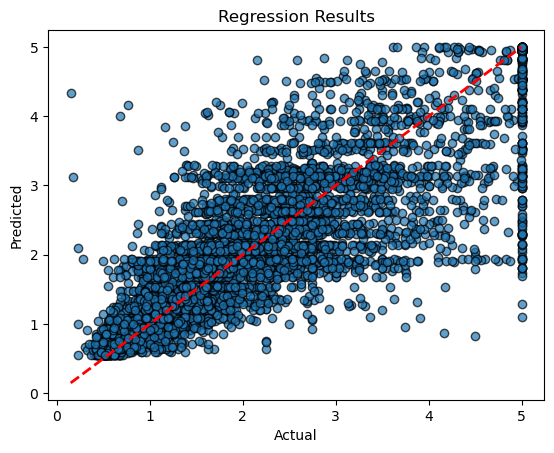

Feature Importances for DecisionTreeRegressor:
[0.7523677696940222, 0.054312670647543894, 0.03939594965320829, 0.0289010161975021, 0.018063349215563275, 0.016610751330116753, 0.015660233455827392, 0.013081537206172096, 0.012182639061490105, 0.012078415824544483, 0.01180650359445901, 0.009037319238041594, 0.004321286748625376, 0.0036437953372366843, 0.003306824389657687, 0.0031587372609906635, 0.0020712011449983522]
--------------------------------------------------------------------------------
Tuning DecisionTreeRegressor (regression) with bayesian search and scoring metric: neg_mean_squared_error
Best Params: OrderedDict({'model__criterion': 'squared_error', 'model__max_depth': 15, 'model__min_samples_leaf': 10, 'model__min_samples_split': 8, 'model__splitter': 'random', 'pca__n_components': 32, 'scaler__with_mean': False, 'scaler__with_std': True})
Best Score (Train): -0.44335955642716474
Test Score: -0.46063609582896514
--------------------------------------------------------------

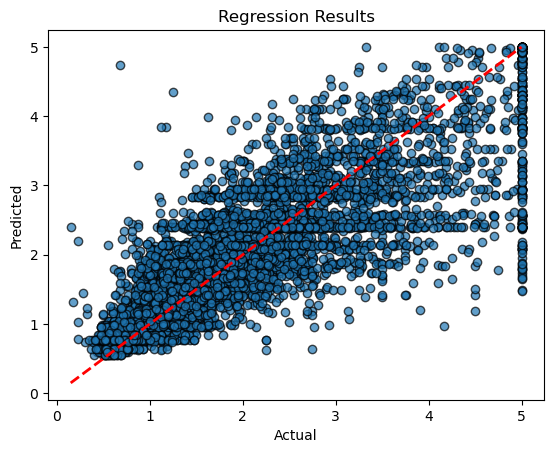

Feature Importances for DecisionTreeRegressor:
[0.7313081121623113, 0.06147376800587993, 0.05051958660418741, 0.017372763567948427, 0.01404068568570856, 0.011702362452884186, 0.011242352208042842, 0.010261624677302317, 0.009063929609098104, 0.009047701828898755, 0.008612783095025141, 0.008582243171467538, 0.007912153136245749, 0.005880531716813678, 0.005471038503586096, 0.005401129812996304, 0.0041538578333478885, 0.0035177859307016783, 0.0035163583445736277, 0.0034231550979821977, 0.003302247654356994, 0.002789697366156266, 0.0020222972028517807, 0.0015726481685891783, 0.0014548976908425161, 0.0013278969021410431, 0.0010792080139879322, 0.0008834274581470144, 0.0008540304186477805, 0.0008084363933641629, 0.0007176698596135786, 0.0006836194262999906]
--------------------------------------------------------------------------------
Evaluating DecisionTreeRegressor with scoring metric: r2
Evaluation Metrics for DecisionTreeRegressor:
Mean Squared Error: 0.4606
R² Score: 0.6490
Evaluating 

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(modelData.drop(columns='y'), modelData['y'], test_size=0.3, random_state=42)
tuner = ModelTuner(models_param_spaces, scoring_criteria)
tuner.tune_all_models('regression', 'bayesian', X_train_reg, y_train_reg, X_test_reg, y_test_reg)

In [ ]:
def RegressionAnalysis(df):
  df=joineddf.drop(columns=['MedHouseVal','geometry'])
  X=df.values
  y=joineddf['MedHouseVal'].values
  scaler = StandardScaler()
  X=scaler.fit_transform(X)
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
  clf=RandomForestRegressor()
  CLFDT=DecisionTreeRegressor()
  clf.fit(x_train,y_train)
  CLFDT.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  y_predDT=CLFDT.predict(x_test)
  print(f"Mean Squared Error for Random Forest: {mean_squared_error(y_test,y_pred)}")
  print(f"R2 Score for Random Forest: {r2_score(y_test,y_pred)}")
  print(f"Mean Squared Error for Decision Tree: {mean_squared_error(y_test,y_predDT)}")
  print(f"R2 Score for Decision Tree: {r2_score(y_test,y_predDT)}")
  importances = clf.feature_importances_
  feature_imp_df = pd.DataFrame({'Feature': df.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
  print(feature_imp_df)
  plt.figure(figsize=(8, 4))
  plt.barh(df.columns, importances, color='skyblue')
  plt.xlabel('Feature Importance')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  
  plt.show()
  return y_pred,y_test,y_predDT
  

RegressionAnalysis(joineddf)